# Project: A Study on Revenue of Films in IMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

&nbsp;&nbsp;&nbsp;This is a study of certain factors that lead to higher revenue in films in IMDb. The data set on which these findings are based entails films released 1960 - 2015. I decided to explore the impact on revenue caused by a film's genre, budget, and the time of the year in which it was released.  I also looked at whether or not the largest production companies were able to generate more revenue due to higher budgets.



In [1]:
# Importing all the necessary packages that will be used in this analysis.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('darkgrid') 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Loading data and inspecting the available columns and their data types.
movies_df = pd.read_csv('tmdb-movies.csv') 


print(movies_df.shape) 
movies_df.head() 

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#show data types of columns
movies_df.dtypes 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#check for null values in columns.  We will drop these in the data cleaning section below!
movies_df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning 


In [5]:
#check for duplicate rows
movies_df.duplicated().sum() 

1

In [6]:
#drop the duplicate row
movies_df.drop_duplicates(inplace=True)  

In [7]:
#confirm changes
movies_df.duplicated().sum() 

0

In [8]:
#drop columns that arent relevant to this particular study
movies_df.drop(['imdb_id', 'cast', 'homepage', 'tagline','keywords','overview'], axis=1, inplace=True) 

In [9]:
# view dimensions of dataset 
print(movies_df.shape) 
# confirm changes 
movies_df.head(1) 

(10865, 15)


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
#drop the rows with null values
movies_df.dropna(inplace=True) 

In [11]:
# confirm changes
movies_df.isnull().sum().any() 

False

In [12]:
#delete the rows with 0 and 1 in the budget column, and  0 in the revenue column
movies_df=movies_df[(movies_df['budget']!= 0) & (movies_df['budget']!= 1) & (movies_df['revenue']!=0)]

In [13]:
print(movies_df.shape) 

(3805, 15)


In [14]:
#change the data type of the budget_adj and revenue_adj columns to int
movies_df['budget_adj'] = movies_df['budget_adj'].astype(int) 

In [15]:
movies_df['revenue_adj'] = movies_df['revenue_adj'].astype(int) 

In [16]:
#connfirm changes
movies_df.dtypes 

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj                int32
revenue_adj               int32
dtype: object

In [17]:
# Modifying the datatype of release date from string to datetime.
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis


###  Plot histogram using data from the revenue column

In [18]:
# use the describe function to find key metrics of movie revenues including the mean and std deviation
movies_df.revenue.describe()

count    3.805000e+03
mean     1.089734e+08
std      1.772976e+08
min      2.000000e+00
25%      1.433379e+07
50%      4.621664e+07
75%      1.260695e+08
max      2.781506e+09
Name: revenue, dtype: float64

No handles with labels found to put in legend.


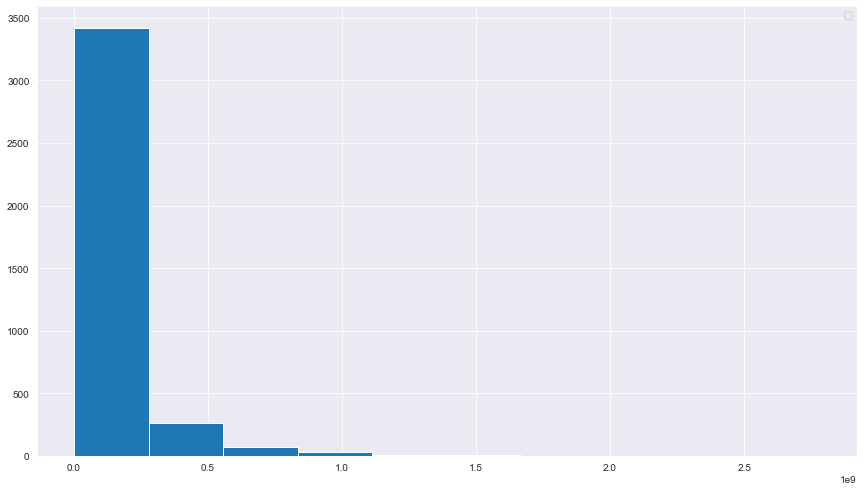

In [19]:
# plot a histogram chart to visualize the data in the revenue column 
movies_df.revenue.hist(figsize=[14.70,8.27], edgecolor="white");
plt.legend();

Using the describe function and histogram above, we can see that a majority of movies produced revenues of less than 126,069,500 USD.  In fact, only 25% of all movies produced generated more than this amount.  Accordingly, the average or mean revenue generated is 108,973,400 USD.  Interestingly, only half of all movies were able to produce revenue of more than 46,216,640 USD.

### Do certain genres generate more revenue?

In [20]:
#create a new DF and replace the bars in the genres column with commas 
Only_Genres_df= movies_df.assign(genres = movies_df['genres'].str.split('|'))

In [21]:
#confirm changes
Only_Genres_df.head() 

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801


In [22]:
# create a new row for each Genre
Only_Genres_df= Only_Genres_df.explode('genres') 

In [23]:
# confirm changes 
Only_Genres_df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892


In [24]:
#group films by genre and get the sum of total revenue for each genre
Only_Genres_df.groupby('genres').sum().revenue

genres
Action             169789712429
Adventure          163439947064
Animation           51632976779
Comedy             132020865550
Crime               54768855062
Documentary           741818831
Drama              130322174349
Family              86211201641
Fantasy             86416098202
Foreign                53258408
History             10498264313
Horror              26479527960
Music               11237463031
Mystery             31243746667
Romance             57144837948
Science Fiction     85081042806
TV Movie               42000000
Thriller           117586480318
War                 12617816329
Western              4545471891
Name: revenue, dtype: int64

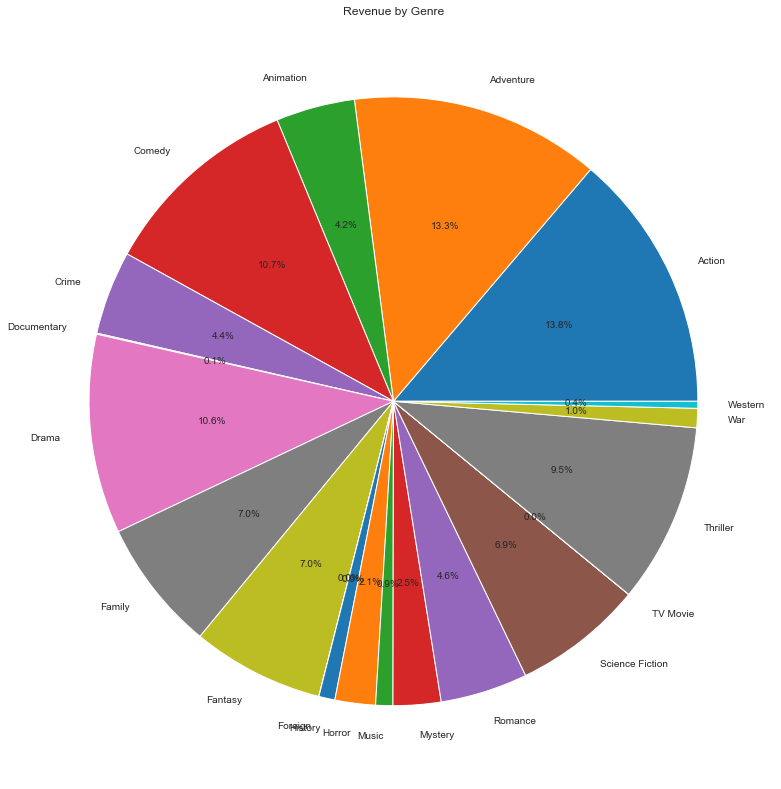

In [25]:
#pie chart visualizing % share of total revenue by genre
plot = Only_Genres_df.groupby('genres').sum().revenue.plot(kind='pie',figsize=(14,14),title='Revenue by Genre',autopct='%1.1f%%')
plot.yaxis.label.set_visible(False)

The chart above shows that Action, Adventure, Comedy, Drama and Thriller movies round out the top 5 movie genres by percentage of total industry revenue generated

### Does the timing of a movie's release date correlate to higher revenue?


In [26]:
movies_df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025


In [27]:
# Add a new column to extract the month from the film's release date.
movies_df['month'] = pd.DatetimeIndex(movies_df['release_date']).month
movies_df['month'].head()

0     6
1     5
2     3
3    12
4     4
Name: month, dtype: int64

In [28]:
movies_df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,5
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,3


Text(0, 0.5, 'Revenue')

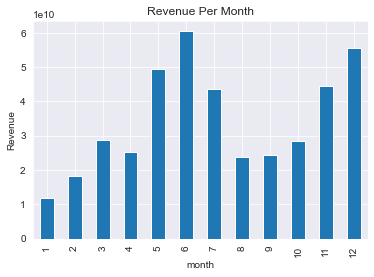

In [29]:
#Group films by month and display a bar chart of total revenues by month
plot = movies_df.groupby('month').sum().revenue.plot(kind='bar',title='Revenue Per Month')
plot.set_ylabel('Revenue')

The chart above shows that most of the movie industry annual revenues is generated in the summer months, followed by the        Holiday Season

### Do certain production companies and higher budgets correlate to higher revenue

In [30]:
#create a new DF and replace the bars in the production_companies column with commas   
Only_production_co_df = movies_df.assign(production_companies = movies_df['production_companies'].str.split('|'))

In [31]:
#confirm changes
Only_production_co_df.head()     

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,137999939,1392445892,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,137999939,348161292,5
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,101199955,271619025,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,183999919,1902723129,12
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,174799923,1385748801,4


In [32]:
#create a new row for each production company
Only_production_co_df = Only_production_co_df.explode('production_companies')   

In [33]:
#confirm changes
Only_production_co_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,137999939,1392445892,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,137999939,1392445892,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,137999939,1392445892,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,137999939,1392445892,6
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,137999939,1392445892,6


In [34]:
#check for null values 
Only_production_co_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
month                   0
dtype: int64

In [35]:
#group df by production companies and get the total amounts for the budget and revenue columns
Only_production_co_df.groupby(['production_companies'])[['budget', 'revenue']].sum()

,budget,revenue
production_companies,,
"""DIA"" Productions GmbH & Co. KG",36000000,44350926
1019 Entertainment,2000000,2801508
10th Hole Productions,14500000,35896141
11:11 Mediaworks,25000000,119188334
120dB Films,6000000,1066471
...,...,...
erbp,100000,444098
iDeal Partners Film Fund,4000000,55125
icon,4361898,3031801


In [36]:
#sort total revenue and budget columns and display in descending order  
Only_production_co_df.groupby(['production_companies'])[['budget', 'revenue']].sum().sort_values(by=['revenue','budget'], ascending=False)

,budget,revenue
production_companies,,
Warner Bros.,19182362367,52450110812
Universal Pictures,14715510132,46230672846
Paramount Pictures,13031208041,39842685068
Twentieth Century Fox Film Corporation,10132465001,36806982348
Walt Disney Pictures,10123431000,32027313979
...,...,...
Leiknar Myndir,10,11
Costa do Castelo Filmes,25000000,6
Neue Constantin Film,25000000,6


In [37]:
# select the top 10 rows using iloc feature
Only_production_co_df.groupby(['production_companies'])[['budget', 'revenue']].sum().sort_values(by=['revenue','budget'], ascending=False).iloc[:10]

,budget,revenue
production_companies,,
Warner Bros.,19182362367,52450110812
Universal Pictures,14715510132,46230672846
Paramount Pictures,13031208041,39842685068
Twentieth Century Fox Film Corporation,10132465001,36806982348
Walt Disney Pictures,10123431000,32027313979
Columbia Pictures,10449415000,28861963974
New Line Cinema,5996800029,20102238723
Amblin Entertainment,3454800000,15549310816
DreamWorks SKG,4641500000,14583989262


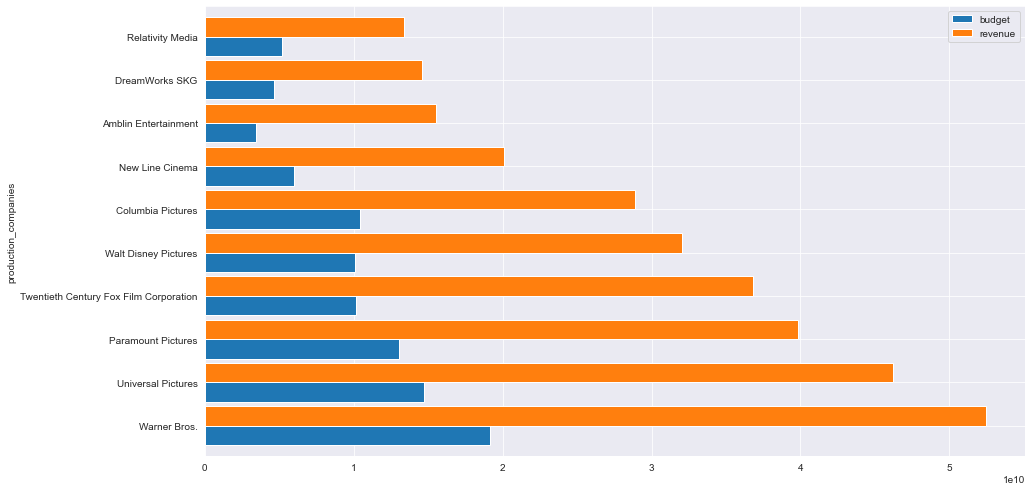

In [38]:
#plot the data with a horizontal bar chart showing the top 10 highest budgets and revenue generated for each production co
Only_production_co_df.groupby(['production_companies'])[['budget', 'revenue']].sum().sort_values(by=['revenue','budget'], ascending=False).iloc[:10].plot.barh(width=.9,figsize=[14.7,8.27]);

The chart above shows that Amblin Entertainment, New Line Cinema, Twentieth Century Fox, Universal Pictures and Warner Brothers seem to get the most bang for their buck when it comes to budget and revenue.  

<a id='conclusions'></a>
## Conclusion

&nbsp;&nbsp;&nbsp;Based on the charts above, it is safe to conclude that certain genres have generated more revenue for the movie industry over time.  Specifically, the Action and Adventure Genres have been responsible for over 25% share of the total revenue produced.  The timing of a movies release also seems to correlate with more revenue such that the Summer months take a majority of the share of when revenues have been highest throughout the calendar year, followed by the Holiday Season.  This makes intuitive sense because as schools are not in session, young people have more free time and go to the movies to be entertained and spend some time in a cool theater during the long, hot, Summer months.  This also makes sense as to why the Action and Adventure Genres have produced more revenue over time as young people tend to be more interested in these types of movies vs other genres, for example Romance or Musicals.  Accordingly, production companies that might specialize in higher revenue producing genres, may have certain variables in place such as writers, storylines, leading actors, computer technology and studio facilities which allow them to produce these types of films at lower cost over time.  Indeed, some production companies seem to have been able to produce more revenue with smaller budgets over time. 

&nbsp;&nbsp;&nbsp;Although the IMDb data set spans over 50 years, this analysis is limited to the amount of usable data we were given.  For example, after dropping the cells and rows which had Null and 0 values, the number of films we were able to include in our analysis dropped from over 10,500 to less than 4,000.  I think filling in those missing values would deepen the scope of our analysis, although I am satisfied with the findings.      

&nbsp;&nbsp;&nbsp;In furthering this study, I would take a closer look at the top ten revenue producing companies shown above and look at exactly what movies they have produced in an attempt to spot certain characteristics that may have lead to higher revenue.  Some examples might be the production of sequels to movies that have previously shown higher revenue production.  Other areas to consider are the movies' Director and Cast which may have a public following due to previously succesful higher revenue producing films.  


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1